# upol

In [1]:
import sys,os
os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import beta
from scipy.integrate import quad

import pylab as py

%matplotlib inline

from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
import fitlab.nest

## setup

In [2]:
conf=load_config('inputs/boermulders.py')
resman=RESMAN(conf)
parman=resman.conf['parman']
nest=load('outputs/boermulders/nest0')
nest.keys()

loading sidis data sets 5023

['active nll', 'samples', 'logz', 'l', 'weights', 'active p', 'x']

## analyze nested sampling statistics

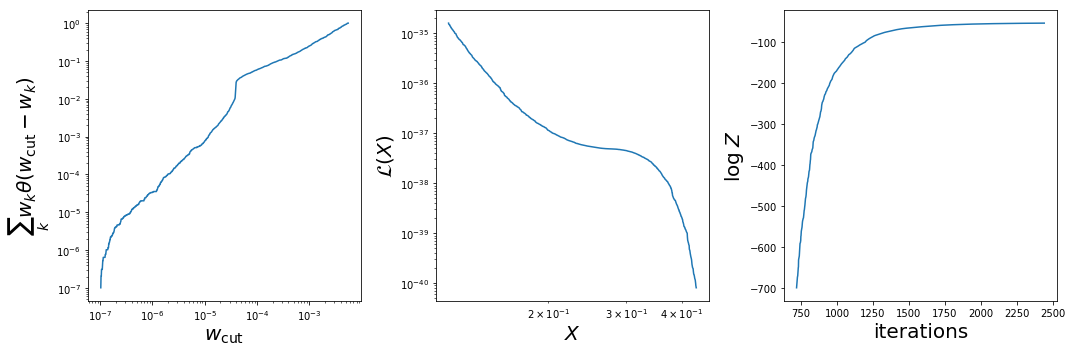

In [7]:
wmin_cut=1e-7

nrows,ncols=1,3
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
weights=np.copy(nest['weights'])
weights=[w for w in weights if w>wmin_cut]
wmin=np.amin(weights)
wmax=np.amax(weights)
w=10**np.linspace(np.log10(wmin),np.log10(wmax),1000)
wsum=lambda wcut: np.sum([w for w in weights if w<wcut])
ax.plot(w,[wsum(wcut) for wcut in w])
ax.semilogx();
ax.semilogy();
ax.set_ylabel(r'$\sum_k w_k \theta(w_{\rm cut}-w_k)$',size=20)
ax.set_xlabel(r'$w_{\rm cut}$',size=20)

ax=py.subplot(nrows,ncols,2)
X=[nest['x'][i] for i in range(len(nest['x'])) if nest['weights'][i]>wmin_cut]
L=[nest['l'][i] for i in range(len(nest['l'])) if nest['weights'][i]>wmin_cut]
ax.plot(X,L)
ax.semilogx()
ax.semilogy()
ax.set_ylabel(r'${\cal L}(X)$',size=20)
ax.set_xlabel(r'$X$',size=20)

ax=py.subplot(nrows,ncols,3)
it=[i for i in range(len(nest['x'])) if nest['weights'][i]>wmin_cut]
LOGZ=[nest['logz'][i] for i in range(len(nest['l'])) if nest['weights'][i]>wmin_cut]
ax.plot(it,LOGZ)
ax.set_ylabel(r'$\log \;Z$',size=20)
ax.set_xlabel(r'iterations',size=20)

py.tight_layout()

## remove samples using sum_w cut criterion.  

In [8]:
weights=[nest['weights'][j] for j in range(len(nest['weights'])) if nest['weights'][j]>wmin_cut]
samples=[nest['samples'][j] for j in range(len(nest['weights'])) if nest['weights'][j]>wmin_cut]
weights/=np.sum(weights)
fnest={}
fnest['weights']=weights
fnest['samples']=samples
print 'nes=%d  fnest=%d'%(len(nest['samples']),len(fnest['samples']))

nes=4040  fnest=2443


## parameters

In [9]:
def plot_params(k,kk):
    order=parman.order
    get_idx=lambda _kk: [i for i in range(len(order)) if order[i][1]==k if order[i][2]==_kk][0]
    nrows,ncols=1,5
    py.figure(figsize=(ncols*3,nrows*2))
    for i in range(len(kk)):
        ax=py.subplot(nrows,ncols,i+1)
        par=np.transpose(samples)[get_idx(kk[i])]
        mean=np.einsum('k,k',weights,par) 
        std=np.einsum('k,k',weights,(np.array(par)-mean)**2)**0.5 
        pmin=conf['params'][k][kk[i]]['min']
        pmax=conf['params'][k][kk[i]]['max']
        ax.hist(par,histtype='stepfilled',weights=weights, range=(pmin,pmax),
                bins=40,facecolor='Yellow',edgecolor='k')
        ax.set_xlim(pmin,pmax)
        #par=samples[get_idx(kk[i])]
        #ax.hist(par,histtype='stepfilled',weights=nes['weights'],range=(pmin,pmax),bins=10,facecolor='Yellow',edgecolor='k')        ax.hist(par1,histtype='stepfilled',weights=core1.nes['weights'],range=(pmin,pmax),bins=10,facecolor='none',edgecolor='r',hatch='...')
        ax.set_title('%s-%s'%(k,kk[i]))
        #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    py.tight_layout()


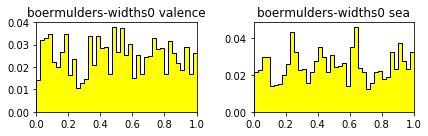

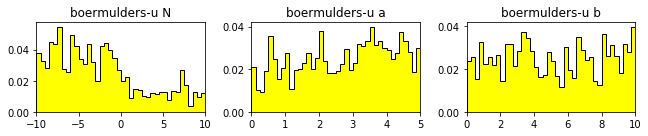

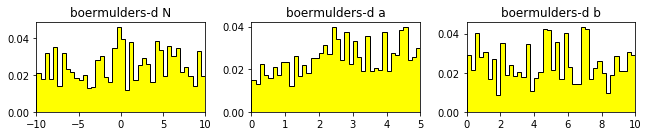

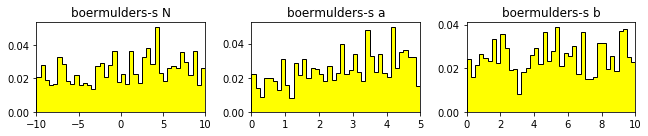

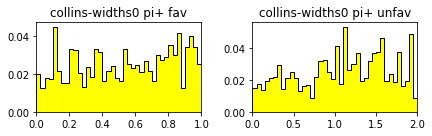

In [10]:
plot_params('boermulders',['widths0 valence','widths0 sea'])
plot_params('boermulders',['u N','u a','u b'])
plot_params('boermulders',['d N','d a','d b'])
plot_params('boermulders',['s N','s a','s b'])
plot_params('collins',['widths0 pi+ fav','widths0 pi+ unfav'])